In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [122]:
data = pd.read_csv('../Datasets/clean.csv')
data = data.drop(['Unnamed: 0', 'id', 'adult', 'imdb_id', 'overview', 'tagline'], axis=1)
data.genres = data.genres.apply(lambda x: eval(x) if pd.notna(x) else x)
data.columns

Index(['title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'budget', 'original_language', 'original_title',
       'popularity', 'genres', 'production_companies', 'production_countries',
       'spoken_languages', 'keywords'],
      dtype='object')

## Release Date

## Vote Averages

### by Budget

<Axes: title={'center': 'Vote Averages by Budget'}, xlabel='Budget (Hundreds of Millions of Dollars)', ylabel='Vote Average'>

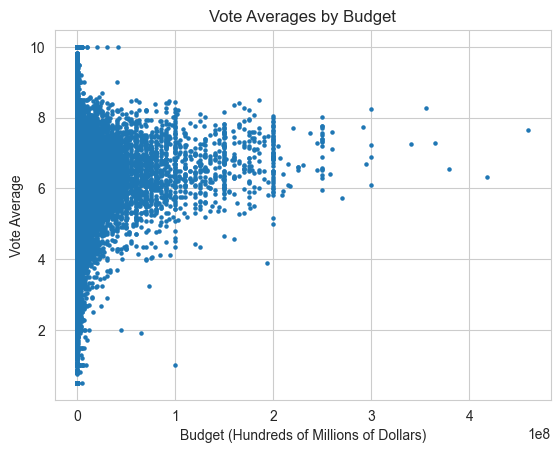

In [123]:
data.plot(kind='scatter', x='budget', y='vote_average', title="Vote Averages by Budget", xlabel="Budget (Hundreds of Millions of Dollars)", ylabel="Vote Average", xticks=np.arange(0,500000000, 100000000), grid=True, marker='.')

### by Popularity

<Axes: xlabel='popularity', ylabel='vote_average'>

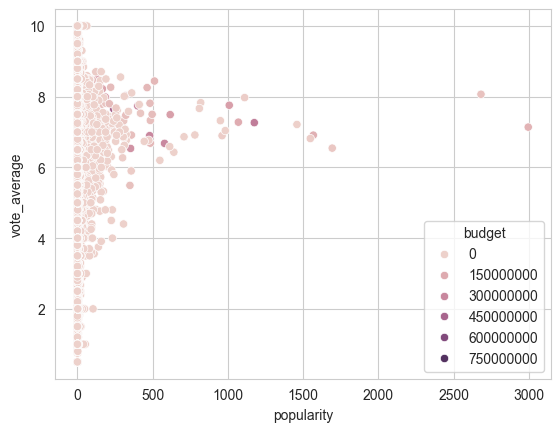

In [124]:
sns.scatterplot(data, x='popularity', y='vote_average', hue='budget')

### by Language

In [125]:
languages = data.original_language
top10_languages = languages.value_counts().head(10).index.tolist()
data_top10_languages = data[data['original_language'].isin(top10_languages)]

In [126]:
sns.violinplot(data_top10_languages, x='original_language', y='vote_average')

TypeError: unhashable type: 'list'

### by Genre

In [127]:
data_genres_exploded = data.explode('genres')
genres_ordered = data_genres_exploded.genres.value_counts()


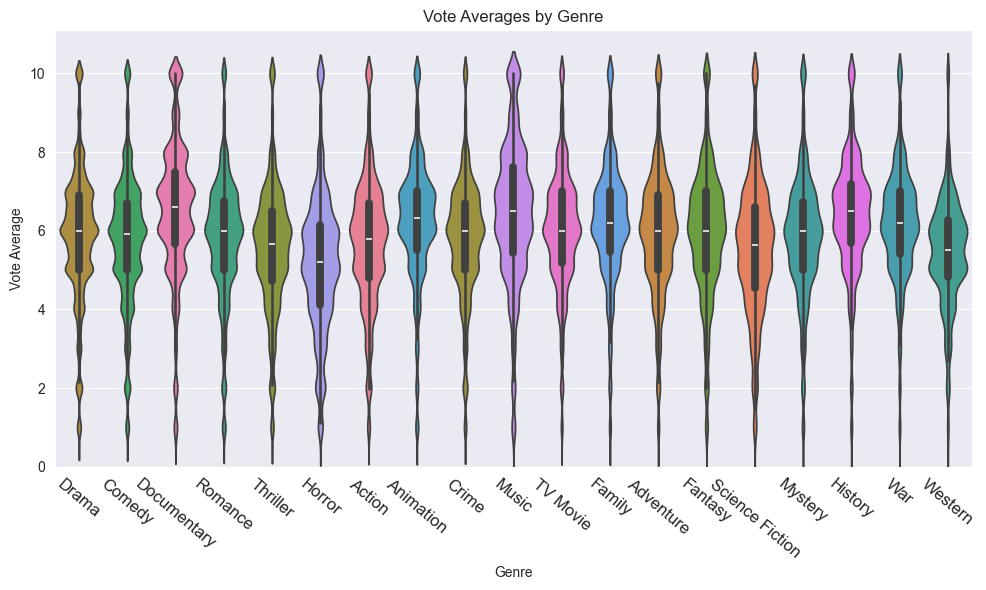

In [132]:
plt.figure(figsize=(10,6))
ax = sns.violinplot(data_genres_exploded.reset_index(), x='genres', y='vote_average', order=genres_ordered.index, hue='genres', legend=False)
ax.set_title("Vote Averages by Genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Vote Average")
ax.tick_params(axis='x', labelsize=12, rotation=-40)
plt.ylim(ymin=0)
plt.tight_layout()
plt.show()


<Axes: xlabel='budget', ylabel='revenue'>

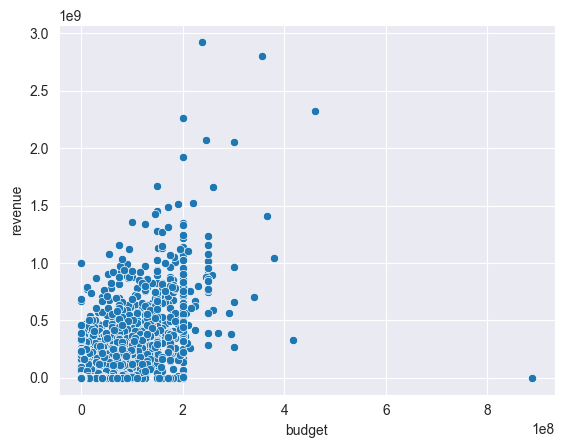

In [6]:
sns.scatterplot(data, x='budget', y='revenue')

## Language

### Language Representation

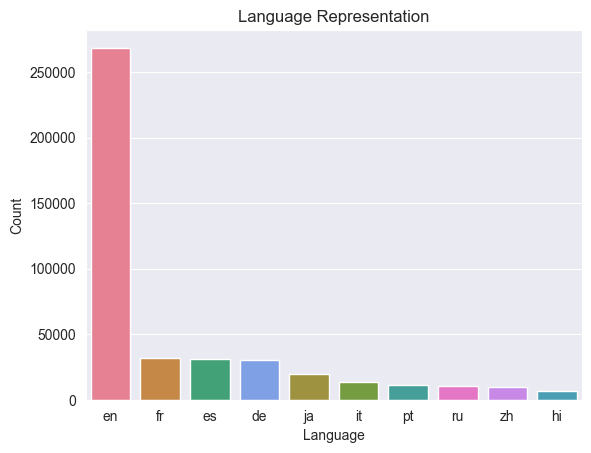

In [7]:
ax = sns.countplot(data=data_top10_languages, x='original_language', hue='original_language', palette='husl', order=top10_languages)
ax.set_title("Language Representation")
ax.set_xlabel("Language")
ax.set_ylabel("Count")
plt.show()

## Pairplot

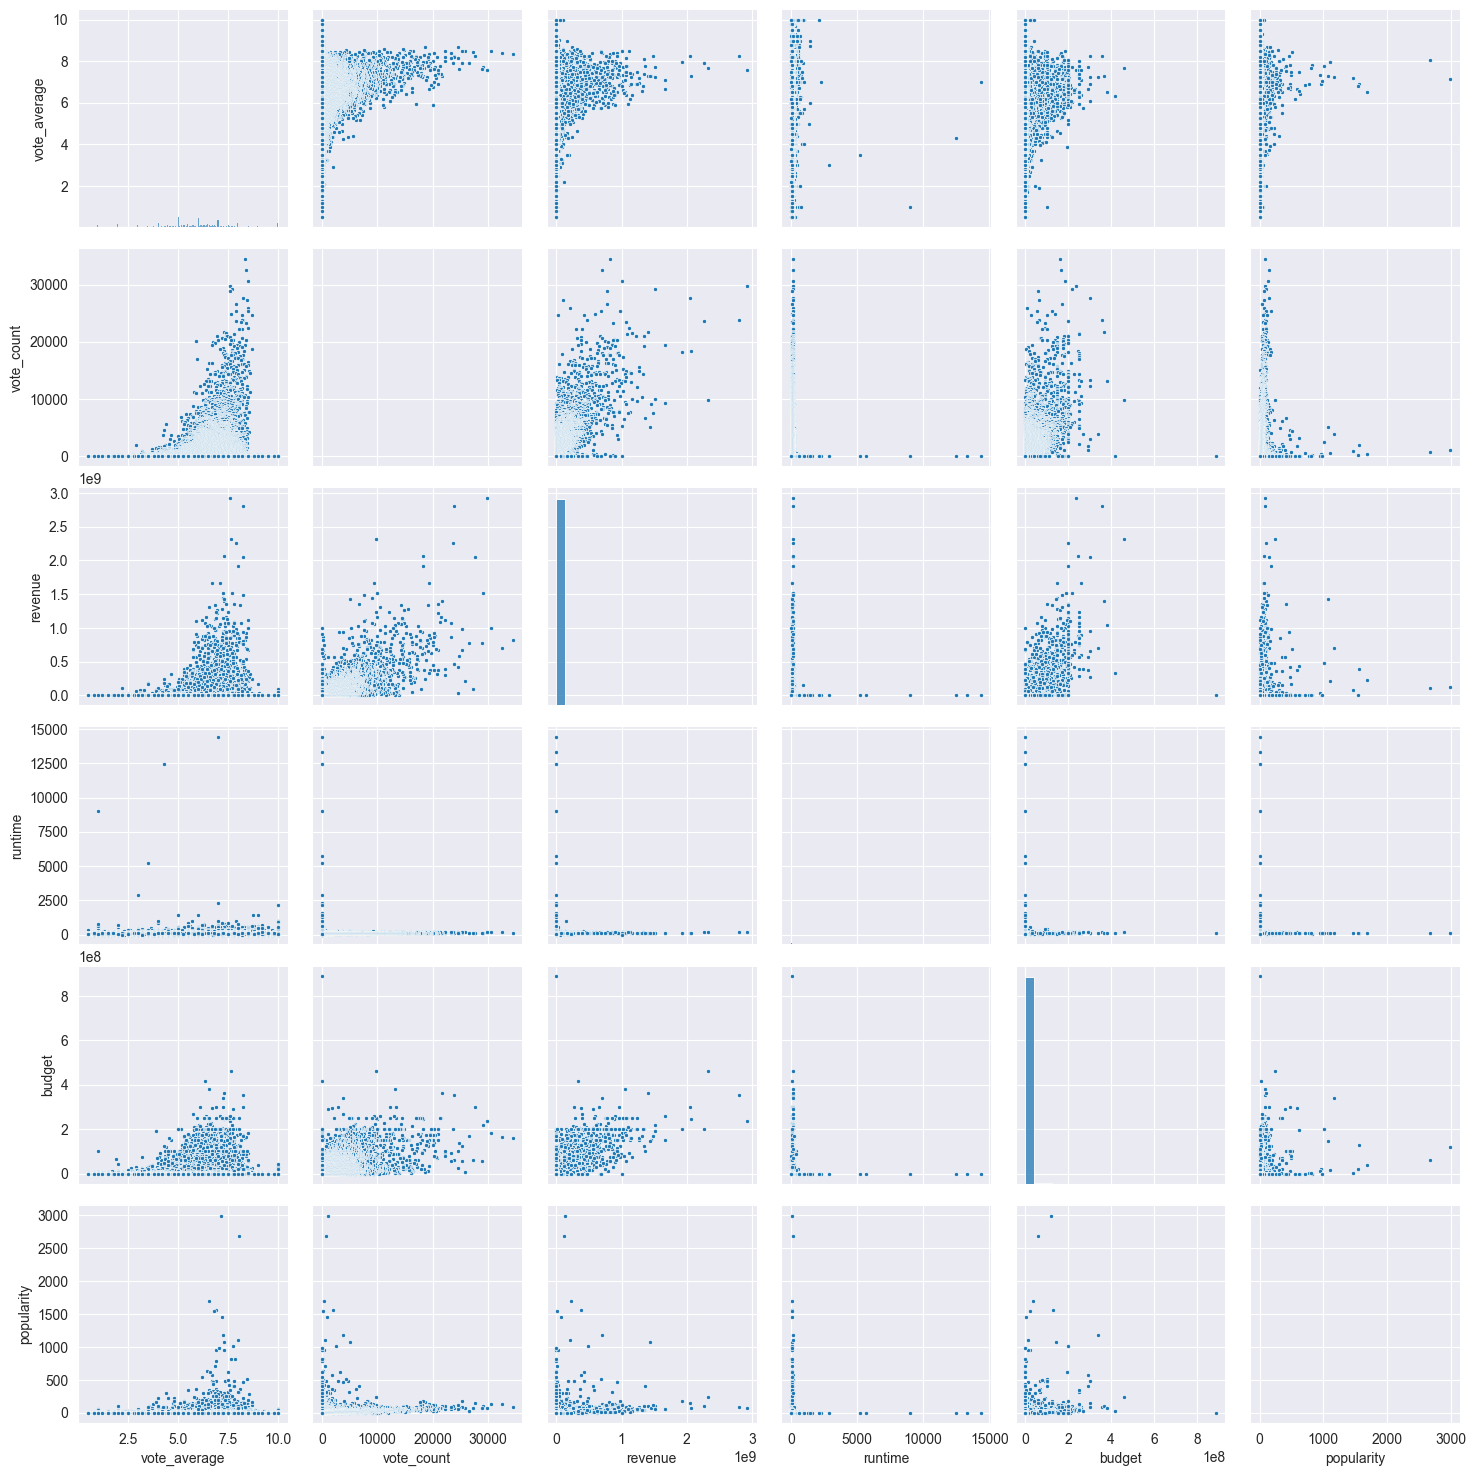

In [8]:
sns.pairplot(data, plot_kws={'marker':'.'})